In [1]:
# Check Your GPU device
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!pip install keras
import keras

     |████████████████████████████████| 378kB 28.4MB/s eta 0:00:01
     |████████████████████████████████| 276kB 33.9MB/s eta 0:00:01
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=0bd3d0d4fee16704060625f11e258b49de3f1763ee58b60bb4333f71d38ce958
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [3]:
!unzip -o -q celeba-dataset_26015.zip

In [4]:
# Importing the Keras libraries and packages
!pip install pandas
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

     |████████████████████████████████| 10.0MB 15.1MB/s eta 0:00:01
     |████████████████████████████████| 512kB 19.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Read document
dt=pd.read_csv('celeba-dataset(26015)/list_attr_celeba.csv').replace(to_replace=-1, value=0, inplace=True)
# Read Images from Folders      
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale = 1./255)

train_datagen = ImageDataGenerator( ##data augmentation and dropout
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

training_set = train_datagen.flow_from_directory('celeba-dataset(26015)/training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                )

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('celeba-dataset(26015)/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            )   
from matplotlib import pyplot as plt
x,y = training_set.next()
for i in range(0,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

Found 21014 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
#! Here We Create the CNN
# Initialising the CNN
from keras.layers import Dropout
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

# Droup out
classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4608)             

In [7]:
#Fitting the CNN to the images
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 20000,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 5001)

# save model to single file
classifier.save("CNN_MoF.hdf5") # Hierarchical Data Format Fifth Version
print("Saved model to disk")

# save training history to another file
import pickle 
filehandler = open('history.pkl', 'wb') 
pickle.dump(history, filehandler)

Epoch 1/5
20000/20000 [==============================] - 1330s 67ms/step - loss: 0.2941 - accuracy: 0.8689 - val_loss: 0.1897 - val_accuracy: 0.9312
Epoch 2/5
20000/20000 [==============================] - 1331s 67ms/step - loss: 0.1920 - accuracy: 0.9211 - val_loss: 0.1584 - val_accuracy: 0.9392
Epoch 3/5
20000/20000 [==============================] - 1350s 67ms/step - loss: 0.1728 - accuracy: 0.9295 - val_loss: 0.0791 - val_accuracy: 0.9411
Epoch 4/5
20000/20000 [==============================] - 1329s 66ms/step - loss: 0.1627 - accuracy: 0.9339 - val_loss: 0.2031 - val_accuracy: 0.9417
Epoch 5/5
20000/20000 [==============================] - 1329s 66ms/step - loss: 0.1562 - accuracy: 0.9369 - val_loss: 0.0182 - val_accuracy: 0.9475
Saved model to disk


In [8]:
from keras.models import load_model
classifier=load_model('CNN_MoF.hdf5')


In [9]:
test_set.reset()
y_pred = classifier.predict_generator(test_set)
y_test = test_set.classes[test_set.index_array]
y_pred = ((y_pred>0.5)*1.0).flatten()  # Set the threshold to be 0.5


# Confusion Matrix
!pip install sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


     |████████████████████████████████| 7.1MB 12.5MB/s eta 0:00:01
     |████████████████████████████████| 296kB 14.5MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=82b6ddc170ccbbb825c48432695be7ffcaf456dbe7630aec039bd676aee779ab
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
from sklearn.metrics import f1_score
print(cm)
print("Prediction Accuracy is",((cm[0,0]+cm[1,1])/sum (sum(cm)))) 
print("Recall-rate is: ",(cm[1,1]/(cm[1,1]+cm[1,0])))
print("F1 Score is: ",(f1_score(y_test, y_pred)))

[[2694  164]
 [  99 2044]]
Prediction Accuracy is 0.9474105178964207
Recall-rate is:  0.9538030797946804
F1 Score is:  0.9395541254883935


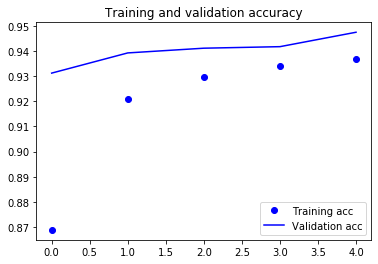

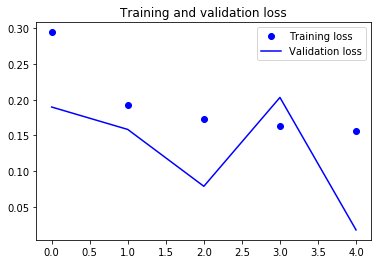

In [11]:
import pickle
with open('history.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()